# Fisher の線形判別分析

\begin{align*}
    \mathbf{W} =& \sum_{k \in \mathcal{G}} \sum_{i:g_i=k} (\mathbf{x}_i - \boldsymbol{\mu}_k) (\mathbf{x}_i-\boldsymbol{\mu}_k)^T \\
    \mathbf{B} =& \mathbf{M}^T \mathbf{M} \notag \\
    =& \left[ \begin{matrix}
            \boldsymbol{\mu}_1 &
            \boldsymbol{\mu}_2 & 
            \cdots &
            \boldsymbol{\mu}_K
        \end{matrix} \right]
        \left[ \begin{matrix}
            \boldsymbol{\mu}_1 ^T \\
            \boldsymbol{\mu}_2^T \\
            \vdots \\
            \boldsymbol{\mu}_K^T
        \end{matrix} \right]
\end{align*}
と定義して、
\begin{align*}
    \max_{\mathbf{a}} \mathbf{a}^T \mathbf{B} \mathbf{a} \quad
    {\rm subject\ to\ }
    \mathbf{a}^T \mathbf{W} \mathbf{a} = 1
\end{align*}
を解く。
Lagrange の未定乗数法を用いる。
\begin{align*}
    L(\mathbf{a}, \lambda)
    = \mathbf{a}^T \mathbf{B} \mathbf{a} - \lambda (\mathbf{a}^T \mathbf{B} \mathbf{a} - 1)
\end{align*}
とおいて微分する。
\begin{align*}
    \cfrac{\partial L}{\partial \mathbf{a}}
    =& 2 \mathbf{B} \mathbf{a} - 2 \lambda \mathbf{W} \mathbf{a} = 0 \\
    \therefore\quad
    \mathbf{B} \mathbf{a} =& \lambda \mathbf{W} \mathbf{a}
\end{align*}


もし$\mathbf{W}$ が正則であれば
\begin{align*}
    \mathbf{W}^{-1} \mathbf{B} \mathbf{a} = \lambda \mathbf{a}
\end{align*}
という固有値問題になる。

固有値の大きい順に固有ベクトルを$L$個とって次元を削減する。

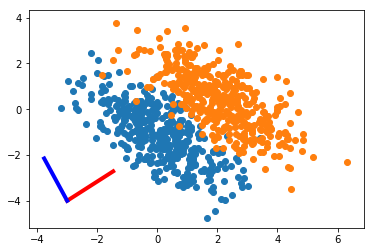

In [70]:
# 2次元データの固有値方向

import numpy as np;
import matplotlib.pyplot as plt;

N = 400;
K = 2;
dim = 2;
L = 1;

# データ生成
m = np.array ([[0,2], [-1,0.5]]);
P = np.array ([[1, 1],[-1, 1]]) / np.array (2);
S_sqrt = np.array ([[2.25, 0], [0, 1]]);
X = np.zeros ((dim, N, K));
for k in range (K):
    tmp = P.dot (S_sqrt).dot (np.random.randn (dim,N)) + m[:,k].reshape (dim,1);
    X[:,:,k] = tmp;
    plt.scatter (X[0,:,k], X[1,:,k]);

    

# 固有値計算
mu = np.zeros ((K, dim));
S_w = np.zeros ((K, dim, dim));
for k in range (K):
    mu[k,:] = np.mean (X[:,:,k], axis=1).T;

for k in range (K):
    for i in range (N):
        xi = (X[:,i,k]-mu[k,:]).reshape (dim,1); 
        S_w[k,:,:] += xi.dot (xi.T);

W = np.sum (S_w, axis=0);
B = mu.T.dot (mu);

[l, a] = np.linalg.eig (np.linalg.inv (W).dot (B));
# print (l);
# print (a);
scale = 2.0;
o = np.array ([[-3],[-4]],dtype=float);
plt.plot ([o[0,0],scale*a[0,0]+o[0,0]],[o[1,0],scale*a[1,0]+o[1,0]], color='red', lw=4)       # 第１固有値方向
plt.plot ([o[0,0],scale*a[0,1]+o[0,0]],[o[1,0],scale*a[1,1]+o[1,0]], color='blue', lw=4)　    # 第２固有値方向

In [1]:
# 実データへの応用

# 作りかけ 2019/06/02

import csv
import numpy as np
import matplotlib.pyplot as plt;

#########################
def normalization_data (X,dim):
    m = np.mean (X,axis=0);
    s = np.std (X,axis=0);
    return (X-m.reshape (1,dim)) / s.reshape(1,dim);

#########################


# get data

# taraining data
train_file = open("./data/vowel_training.csv", "r", encoding="utf_8", errors="", newline="" )
train_f = csv.reader(train_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
header = next(train_f);
train_data = np.array ([[float (x) for x in row[1:]] for row in train_f]);
train_Y = np.array ([int(x-1) for x in train_data[:,0]]);
train_X_raw = train_data[:,1:];

K = len(np.unique(train_Y));
N, dim = train_X_raw.shape;

# normalize the data
train_X = normalization_data (train_X_raw, dim)

# calcurate the eigenvalues
mu = np.zeros ((K, dim));
numK = np.zeros (K);
S_w = np.zeros ((K, dim, dim));
for i in range (N):
    k = train_Y [i];
    mu[k,:] += train_X[i,:];
    numK[k] += 1;
    
    
for k in range (K):
    mu[k,:] /= numK[k];
    for i in range (N):
        xi = (train_X[i,:]-mu[k,:]).reshape (dim,1); 
        S_w[k,:,:] += xi.dot (xi.T);

W = np.sum (S_w, axis=0);
B = mu.T.dot (mu);

# reduce dimensions
[l, a] = np.linalg.eig (np.linalg.inv (W).dot (B));
# print (l);
# print (a);
reduced_X = a.T.dot (train_X.T);
reduced_mu = a.T.dot (mu.T)


/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


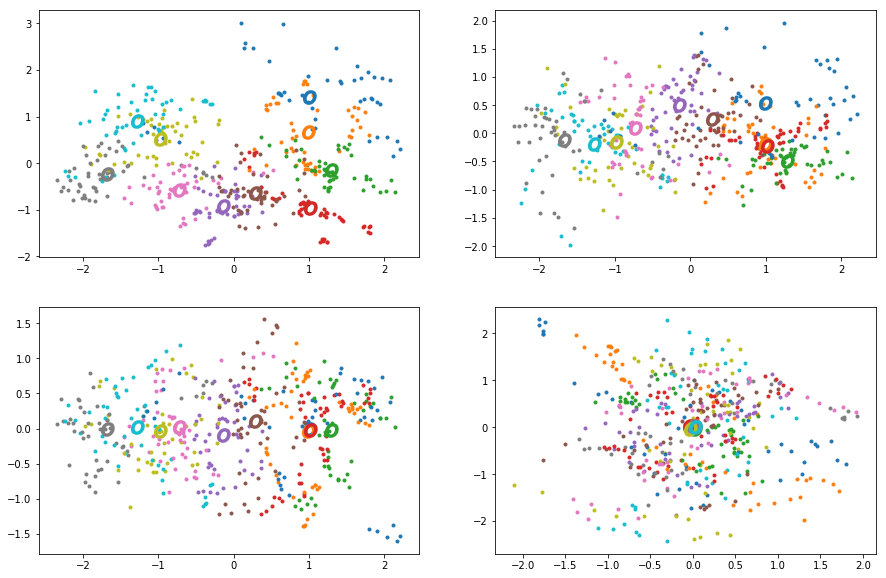

In [8]:
# plots
cmap = plt.get_cmap("tab10")
fig = plt.figure (figsize=(15,10));


for i in range (N):
    k = train_Y[i];
    if k<10:
        ax = fig.add_subplot(2, 2, 1)
        ax.scatter (reduced_X[0,i], reduced_X[1,i], color=cmap(k), marker='.')
        ax = fig.add_subplot(2, 2, 2)
        ax.scatter (reduced_X[0,i], reduced_X[2,i], color=cmap(k), marker='.')
        ax = fig.add_subplot(2, 2, 3)
        ax.scatter (reduced_X[0,i], reduced_X[7,i], color=cmap(k), marker='.')
        ax = fig.add_subplot(2, 2, 4)
        ax.scatter (reduced_X[8,i], reduced_X[9,i], color=cmap(k), marker='.')


for k in range (K-1):
    ax = fig.add_subplot (2,2,1);
    ax.scatter (reduced_mu [0,k], reduced_mu [1,k], color=cmap(k), marker='$O$', s=160, linewidths="2")
    ax = fig.add_subplot (2,2,2);
    ax.scatter (reduced_mu [0,k], reduced_mu [2,k], color=cmap(k), marker='$O$', s=160, linewidths="2")
    ax = fig.add_subplot (2,2,3);
    ax.scatter (reduced_mu [0,k], reduced_mu [7,k], color=cmap(k), marker='$O$', s=160, linewidths="2")
    ax = fig.add_subplot (2,2,4);
    ax.scatter (reduced_mu [8,k], reduced_mu [9,k], color=cmap(k), marker='$O$', s=160, linewidths="2")

        
plt.show ()


In [2]:
# test data
test_file = open("./data/vowel_test.csv", "r", encoding="utf_8", errors="", newline="" )
test_f = csv.reader(test_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
header = next(test_f);
test_data = np.array ([[float (x) for x in row[1:]] for row in test_f]);
test_Y = np.array ([int(x-1) for x in test_data[:,0]]);
test_X_raw = test_data[:,1:];

N_test, _ = test_X_raw.shape;

# normalize the data
test_X = normalization_data (test_X_raw, dim)

reduced_test_X = a.T.dot (test_X.T);



In [37]:
import numpy as np;

class LDA:
    
    def __init__ (self,train_X, train_Y, N, K, dim):
        self._train_X = train_X;
        self._train_Y = train_Y;
        self._N = N;
        self._K = K;
        self._dim = dim;
        self._Ns = np.zeros ((1,K));
        self._p_mu = np.zeros ((K,dim));
        self._p_sigma = np.zeros ((dim,dim));
    
    def learning (self):
        p_sigma_k = np.zeros ((self._K,self._dim,self._dim))
        
        for i in range (self._N):
            k = self._train_Y [i];
            self._Ns[0,k] += 1;
            self._p_mu[k,:] += self._train_X[i,:];
        
        for k in range (self._K):
            self._p_mu[k,:] /= self._Ns[0,k];
            
        for i in range (self._N):
            k = self._train_Y[i];
            tmp = (self._train_X[i,:] - self._p_mu[k,:]).reshape ((self._dim,1))
            p_sigma_k[k] += tmp.dot (tmp.T);
        
        self._p_sigma = np.sum (p_sigma_k, axis=0) / (self._N-self._K);
        
    def predict (self, x):
        tmp1 = x.dot (self._p_sigma).dot (self._p_mu.T);
        tmp2 = np.diag (self._p_mu.dot (self._p_sigma).dot (self._p_mu.T) / 2);
        tmp3 = np.log (self._Ns);
        return np.argmax (tmp1.reshape (1,11) - tmp2.reshape (1,11) + tmp3);
    

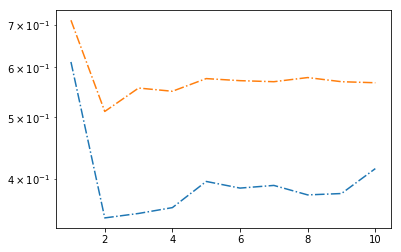

In [47]:

import matplotlib.pyplot as plt;

misrate_train = np.zeros((dim,1), dtype=float);
misrate_test = np.zeros((dim,1), dtype=float);

for L in range (1,dim+1):
    
    r_train_X = reduced_X[0:L,:].T
    r_test_X = reduced_test_X[0:L,:].T
    
    
    lda = LDA (r_train_X, train_Y, N, K, L);
    lda.learning ();
    
    # check
    for i in range (N):
        if train_Y[i] != lda.predict (r_train_X[i,:]):
            misrate_train[L-1,0] += 1.0;
            #print ('true {}: predict {}'.format (train_Y[i], lda.predict (r_train_X[i,:])))
    misrate_train[L-1,0] /= N;
    
    for i in range (N_test):
        if test_Y[i] != lda.predict (r_test_X[i,:]):
            misrate_test[L-1,0] += 1.0;
            #print ('true {}: predict {}'.format (test_Y[i], lda.predict (r_test_X[i,:])))
    misrate_test[L-1,0] /= N_test;


plt.plot (range (1,dim+1), misrate_train, '-.')
plt.plot (range (1,dim+1), misrate_test, '-.')
plt.yscale ('log')
# なんか教科書のグラフと違う気がするなぁ